In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
app_train = pd.read_csv('application_train.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
unique_house_type = app_train['HOUSETYPE_MODE'].unique()
unique_house_type

array(['block of flats', nan, 'terraced house', 'specific housing'],
      dtype=object)

In [22]:
nrows = len(unique_house_type)
nrows

4

In [23]:
ncols = nrows // 2
ncols

2

ValueError: could not convert string to float: 'block of flats'

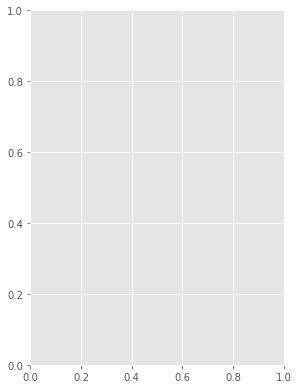

In [26]:
plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot(app_train.loc[(app_train['HOUSETYPE_MODE'] == unique_house_type[i]) & \
                              (app_train['TARGET'] == 0), 'HOUSETYPE_MODE'], 
                 label = "TARGET = 0", hist = False)
    
    sns.distplot(app_train.loc[(app_train['HOUSETYPE_MODE'] == unique_house_type[i]) & \
                              (app_train['TARGET'] == 1), 'HOUSETYPE_MODE'], 
                 label = "TARGET = 1", hist = False)
    plt.title(str(unique_house_type[i]))
plt.show()    